In [15]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline


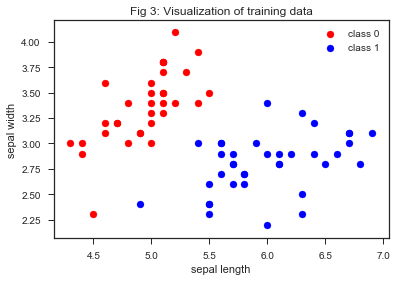

In [11]:
iris = datasets.load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target
#The first 50 samples are class 0 and the next 50 samples are class 1
X = X[:100]
Y = Y[:100]
number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

#Visualizing the training data
X_class0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

plt.scatter(X_class0[:,0].tolist(), X_class0[:,1].tolist(),color='red')
plt.scatter(X_class1[:,0].tolist(), X_class1[:,1].tolist(),color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Fig 3: Visualization of training data')
plt.show()

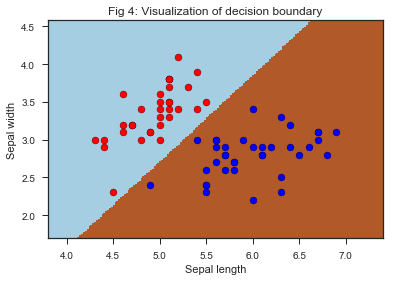

In [12]:
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
full_X = np.concatenate((X_class0,X_class1),axis=0)
full_Y = np.concatenate((Y_class0,Y_class1),axis=0)
model.fit(full_X,full_Y)

# Display the decision boundary
#(Visualization code taken from: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - .5, full_X[:, 0].max() + .5
y_min, y_max = full_X[:, 1].min() - .5, full_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_class0[:, 0].tolist(), X_class0[:, 1].tolist(), c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_class1[:, 0].tolist(), X_class1[:, 1].tolist(), c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

In [14]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 0.0 %
test misclassification percentage = 0.0 %
